# Сборный проект — 2. HR аналитика

# Задача HR-аналитиков компании «Работа с заботой»

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом. Бизнес предоставляет данные, а аналитики предлагают решения для предотвращения финансовых потерь и оттока сотрудников. В этой задаче HR-аналитикам помогает машинное обучение, которое позволяет быстрее и точнее отвечать на запросы бизнеса.

## Данные компании

Компания предоставила данные о характеристиках сотрудников. Среди них — уровень удовлетворённости сотрудника работой, полученный из форм обратной связи. Сотрудники заполняют опросы, по результатам которых рассчитывается доля удовлетворённости: от 0 до 1, где:

- **0** — совершенно неудовлетворён;
- **1** — полностью удовлетворён.

## Сложности в сборе данных

Сбор данных через опросники — непростая задача. Компания большая, и всех сотрудников необходимо сначала оповестить об опросе, а затем проследить, чтобы каждый его прошёл.

## Ваши задачи

1. **Первая задача** — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

   _Почему это важно_: Удовлетворённость работой напрямую влияет на отток сотрудников, и её предсказание — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

2. **Вторая задача** — построить модель, которая сможет на основе данных заказчика предсказать вероятность того, что сотрудник уволится из компании.


# Задачи

## Задача 1: Предсказание уровня удовлетворённости сотрудника

### Шаги:

1. **Загрузка данных**
   - Импорт данных для дальнейшего анализа.

2. **Предобработка данных**
   - Очистка данных от пропусков и аномалий.
   - Преобразование категориальных признаков в числовые для моделей.

3. **Исследовательский анализ данных**
   - Визуализация данных для понимания распределения признаков и целевой переменной.
   - Оценка корреляций между признаками.

4. **Подготовка данных**
   - Разделение данных на тренировочный и тестовый наборы.
   - Кодирование признаков и масштабирование данных.

5. **Обучение моделей**
   - Построение и обучение нескольких моделей машинного обучения для предсказания уровня удовлетворённости.
   - Подбор гиперпараметров для улучшения точности модели.

6. **Оформление выводов**
   - Оценка качества модели.
   - Выводы о значимости признаков и точности предсказаний.

---

## Задача 2: Предсказание увольнения сотрудника из компании

### Шаги:

1. **Загрузка данных**
   - Импорт данных для дальнейшего анализа.

2. **Предобработка данных**
   - Заполнение пропусков и обработка аномальных данных.
   - Преобразование категориальных данных в числовые для обучения модели.

3. **Исследовательский анализ данных**
   - Визуализация и анализ распределений признаков.
   - Оценка факторов, влияющих на увольнение сотрудников.

4. **Добавление нового входного признака**
   - Создание нового признака на основе существующих данных, который может улучшить точность модели.

5. **Подготовка данных**
   - Подготовка наборов данных для обучения, включая кодирование признаков и их масштабирование.

6. **Обучение модели**
   - Обучение нескольких моделей классификации для предсказания увольнения сотрудников.
   - Настройка гиперпараметров и выбор лучшей модели.

7. **Выводы**
   - Оценка модели на тестовой выборке с использованием метрики ROC-AUC.
   - Оформление выводов о результатах модели и значимости признаков.


#### Импорт библиотек

In [75]:
!pip install --upgrade scikit-learn --quiet
!pip install phik --quiet

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phik
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

In [77]:
RANDOM_STATE = 42

# Задача 1

## Шаг 1. Загрузка данных

In [78]:
try:
    train_data = pd.read_csv('datasets/train_job_satisfaction_rate.csv')
    test_data_X = pd.read_csv('datasets/test_features.csv')
    test_data_y = pd.read_csv('datasets/test_target_job_satisfaction_rate.csv')
except FileNotFoundError:
    train_data = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    test_data_X = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    test_data_y = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

#### Первичный анализ данных

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [80]:
train_data.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


In [81]:
test_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [82]:
test_data_X.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


In [83]:
test_data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [84]:
test_data_y.describe()

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


#### Промежуточный вывод <br>
Данные успешно загружены и выглядят корректно.

## Шаг 2. Предобработка данных

#### Обработка пропусков

In [85]:
print(f'Количество пропусков в train_data: {train_data.isna().sum().sum()}')
print(f'Количество пропусков в test_data_X: {test_data_X.isna().sum().sum()}')
print(f'Количество пропусков в test_data_y: {test_data_y.isna().sum().sum()}')

Количество пропусков в train_data: 10
Количество пропусков в test_data_X: 3
Количество пропусков в test_data_y: 0


Заполним пропуски позже с помощью пайплайна и SimpleImputer.

#### Обработка дубликатов и опечаток

In [86]:
print(f'Количество дубликатов в train_data: {train_data.duplicated().sum()}')
print(f'Количество дубликатов в test_data_X: {test_data_X.duplicated().sum()}')
print(f'Количество дубликатов в test_data_y: {test_data_y.duplicated().sum()}')

Количество дубликатов в train_data: 0
Количество дубликатов в test_data_X: 0
Количество дубликатов в test_data_y: 0


In [87]:
train_data.loc[train_data['level'] == 'sinior', 'level'] = 'senior'
test_data_X.loc[test_data_X['level'] == 'sinior', 'level'] = 'senior'

display(train_data['level'].value_counts())
display(test_data_X['level'].value_counts())
print()
display(train_data['workload'].value_counts())
display(test_data_X['workload'].value_counts())

test_data_X.loc[test_data_X['workload'] == ' ', 'workload'] = test_data_X['workload'].mode()[0]

level
junior    1894
middle    1744
senior     358
Name: count, dtype: int64

level
junior    974
middle    854
senior    171
Name: count, dtype: int64

workload
medium    2066
low       1200
high       734
Name: count, dtype: int64

workload
medium    1043
low        593
high       363
             1
Name: count, dtype: int64

#### Промежуточный вывод <br>
Дубликаты отсутствуют. Опечатку в данных исправили. Пропуски заполним позже с помощью пайплайна и SimpleImputer.

## Шаг 3. Исследовательский анализ данных

#### Исследование количественных признаков для тренировочной выборки

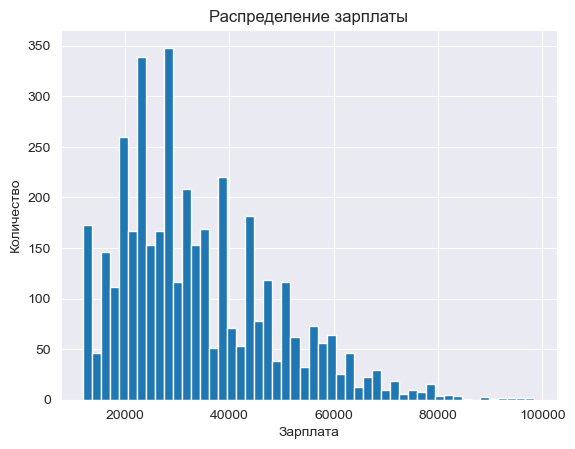

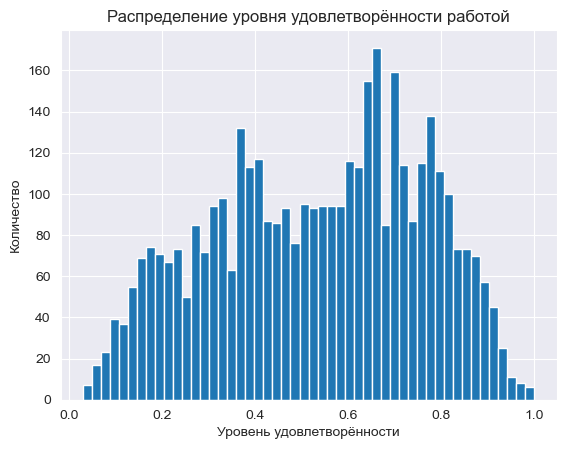

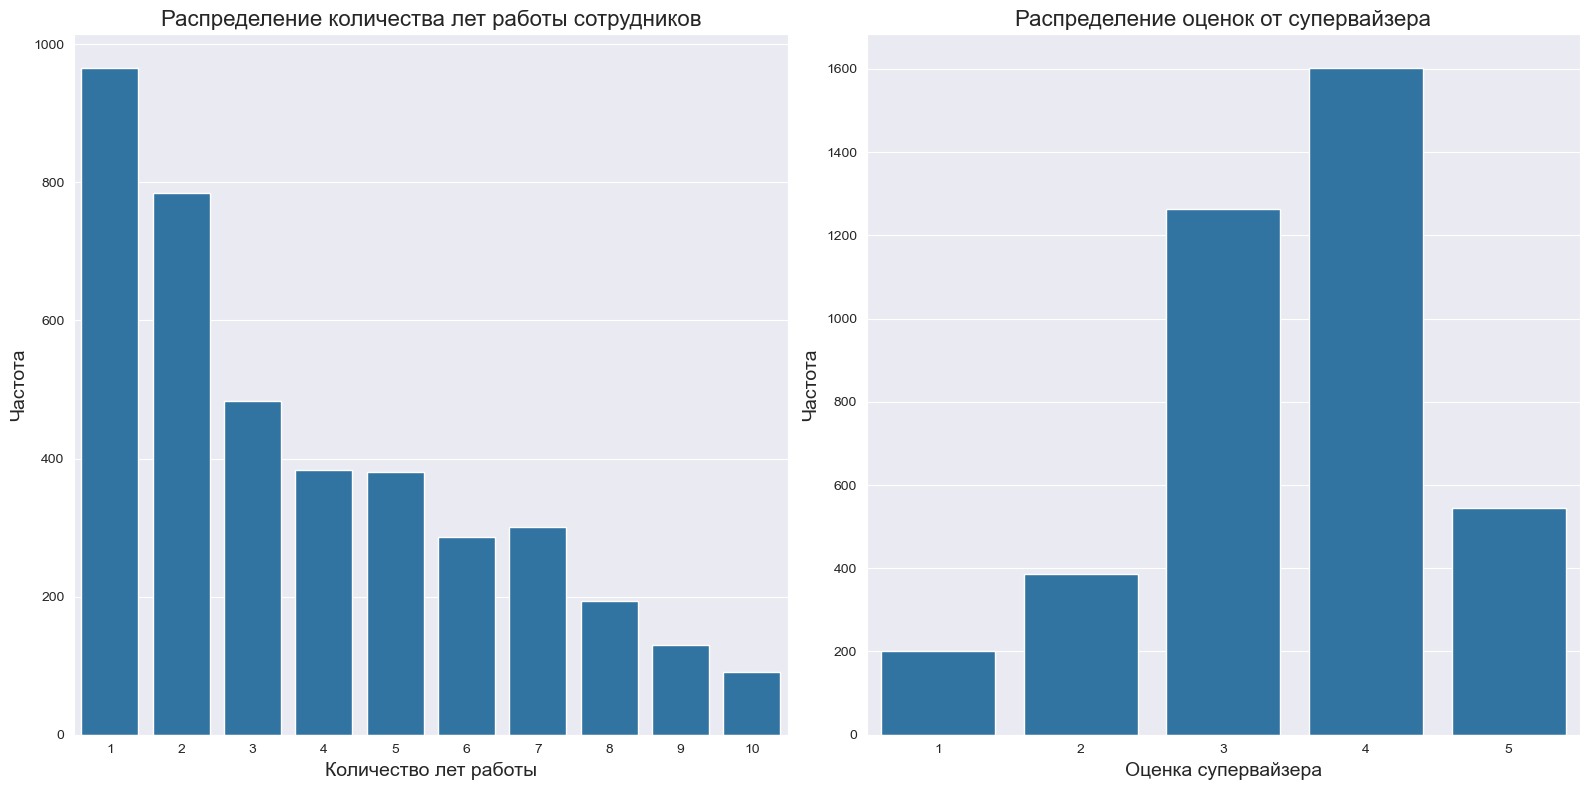

In [88]:
# Salary
train_data['salary'].hist(bins=50)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

# Job satisfaction rate
train_data['job_satisfaction_rate'].hist(bins=50)
plt.title('Распределение уровня удовлетворённости работой')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Количество')
plt.show()

# Employment years & supervisor evaluation
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='employment_years', data=train_data)
plt.title('Распределение количества лет работы сотрудников', fontsize=16)
plt.xlabel('Количество лет работы', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x='supervisor_evaluation', data=train_data)
plt.title('Распределение оценок от супервайзера', fontsize=16)
plt.xlabel('Оценка супервайзера', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.tight_layout()
plt.show()

#### Промежуточный вывод <br>
- Длительность работы в команде и оценку руководителя можно закодировать с помощью OrdinalEncoder.
- Зарплату можно нормализировать с помощью StandardScaler.
- Уровень удовлетворённости работой - целевой признак.

#### Исследование категориальных признаков для тренировочной выборки

Гистограммы и столбчатые диаграммы

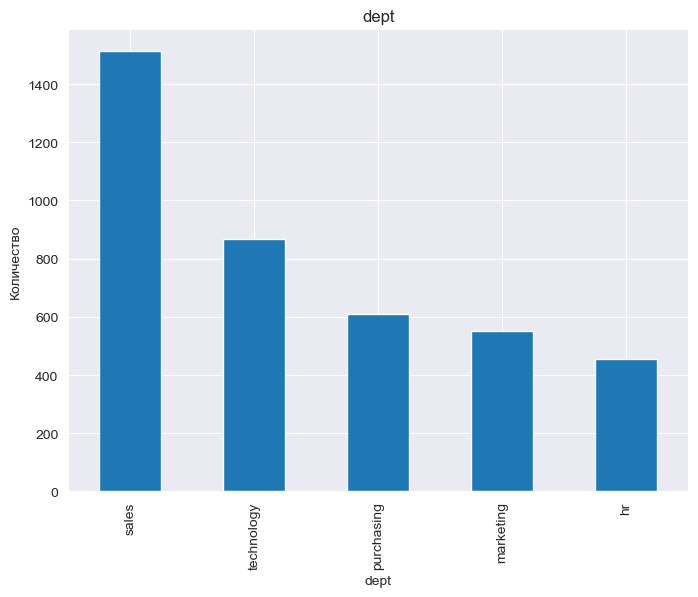

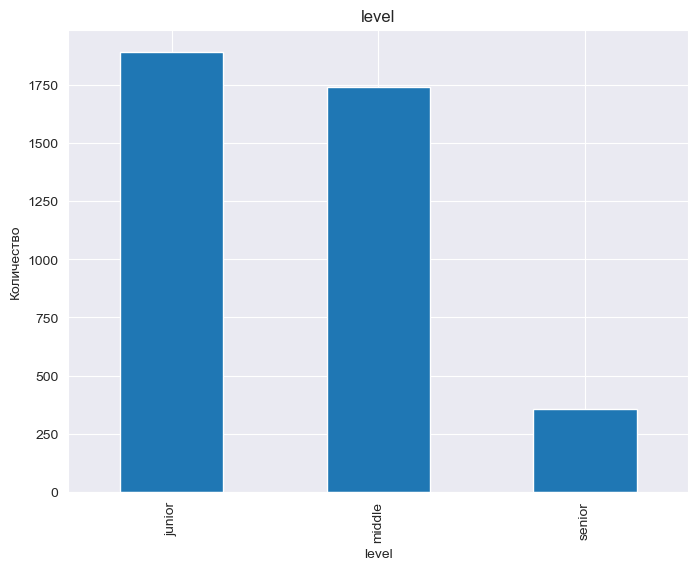

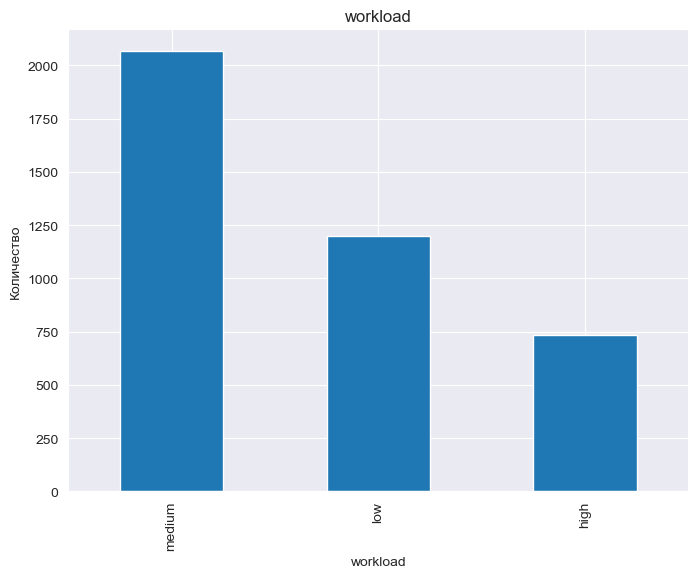

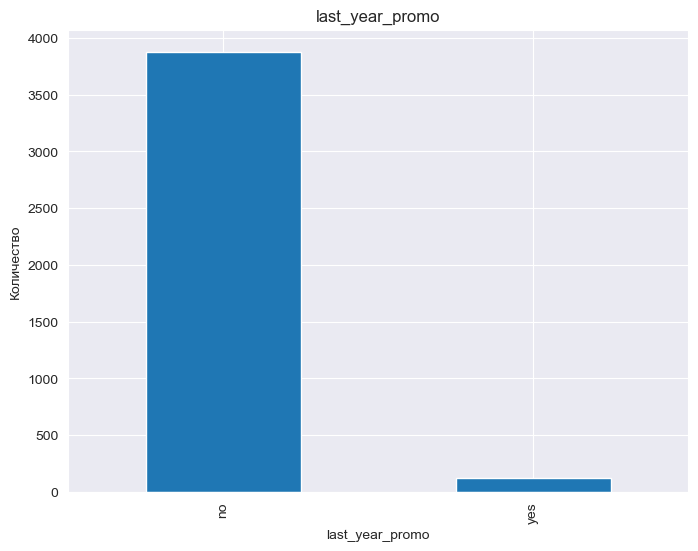

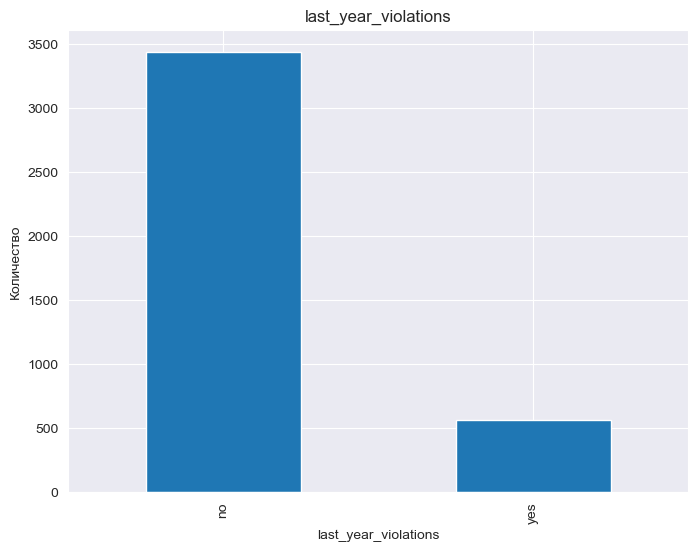

In [89]:
categorical_columns = train_data.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    train_data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

#### Промежуточный вывод <br>
- Отдел, было ли повышение за последний год, были ли нарушения за последний год закодируем с помощью OneHotEncoder.
- Уровень должности, уровень загруженности закодируем с помощью OrdinalEncoder.

#### Боксплоты для категориальных признаков для тренировочной выборки

<Figure size 800x600 with 0 Axes>

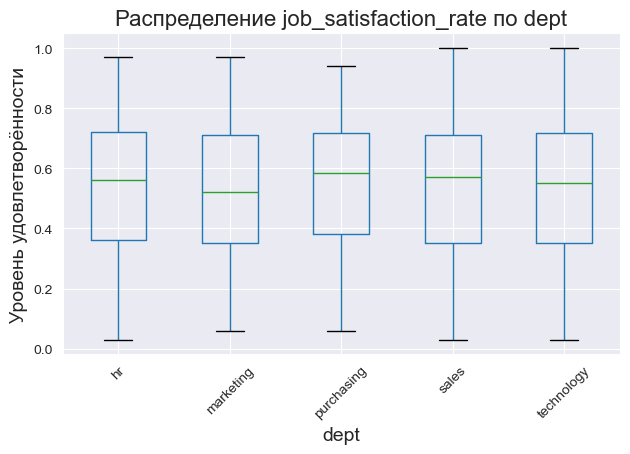

<Figure size 800x600 with 0 Axes>

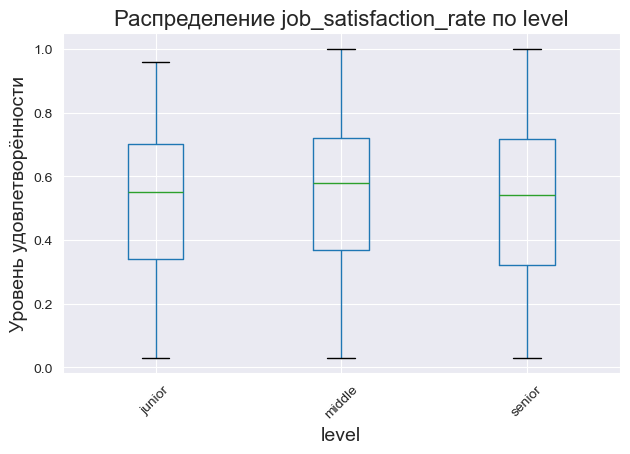

<Figure size 800x600 with 0 Axes>

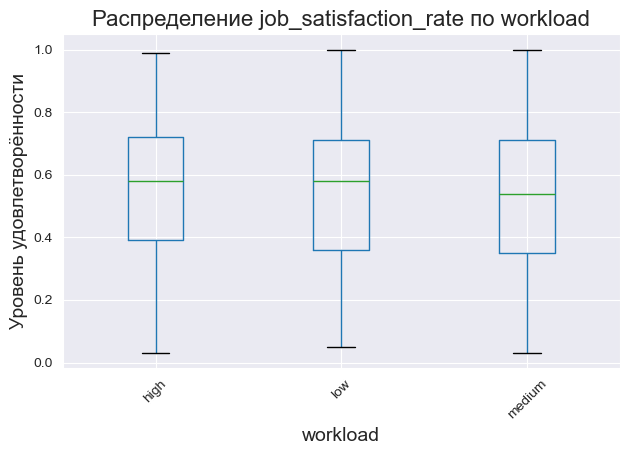

<Figure size 800x600 with 0 Axes>

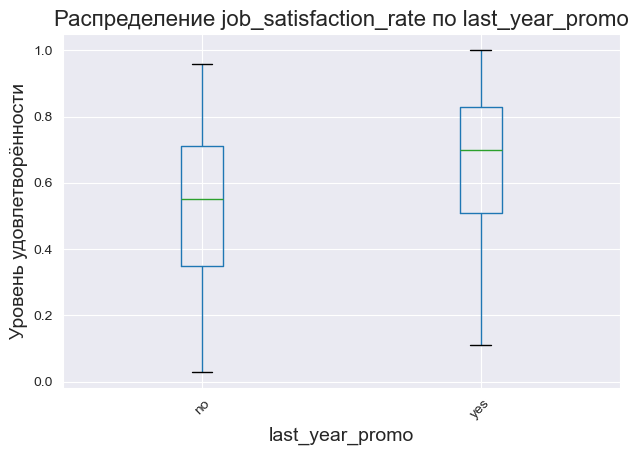

<Figure size 800x600 with 0 Axes>

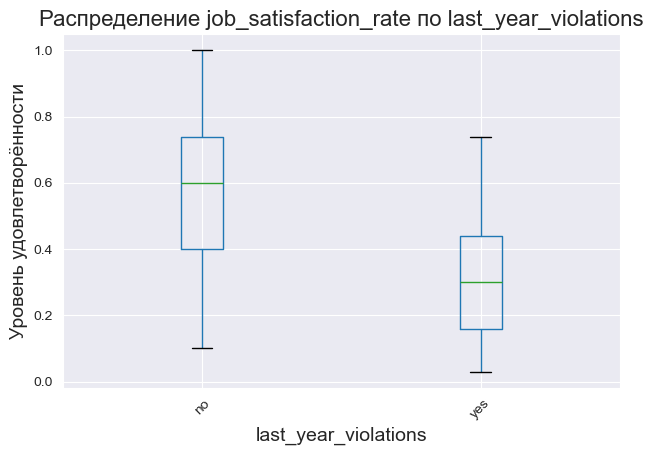

In [90]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    train_data.boxplot(column='job_satisfaction_rate', by=column)

    plt.title(f'Распределение job_satisfaction_rate по {column}', fontsize=16)
    plt.suptitle('')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Уровень удовлетворённости', fontsize=14)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

#### Промежуточный вывод <br>
Выбросы в данных отсутствуют.

#### Гистограммы и столбчатые диаграммы для тестовой выборки

#### Исследование количественных признаков для тестовой выборки

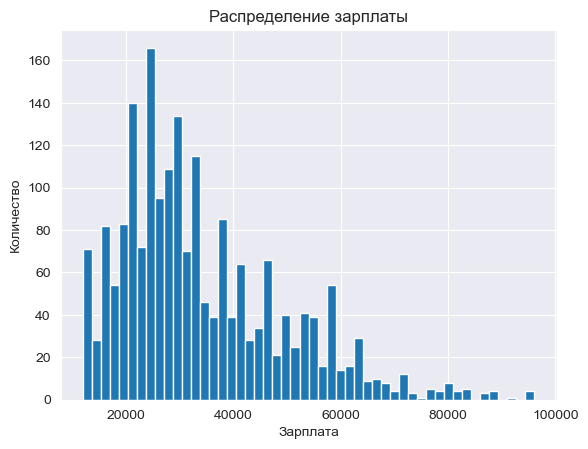

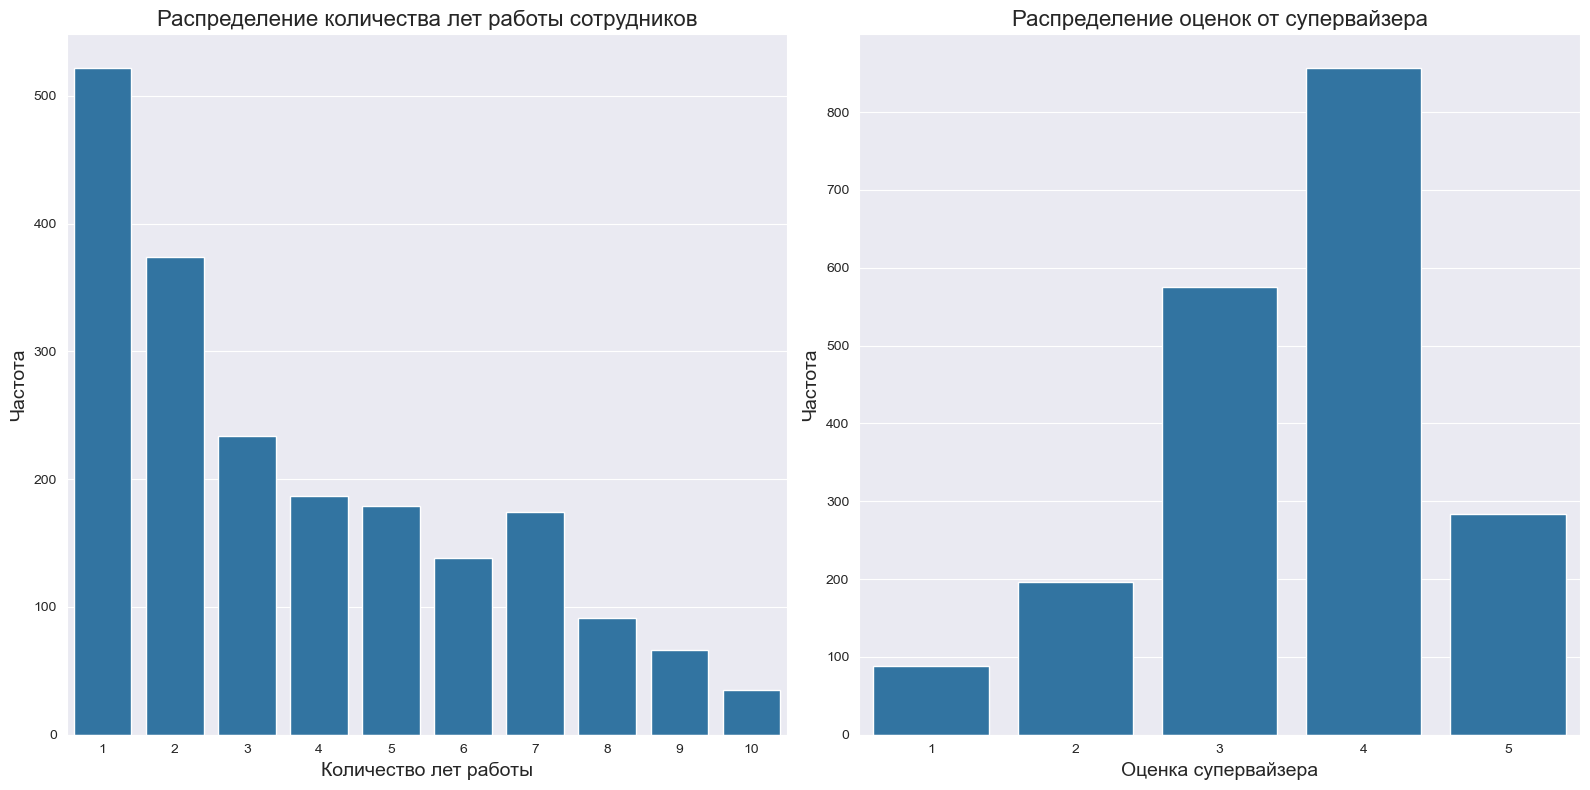

In [91]:
# Salary
test_data_X['salary'].hist(bins=50)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

# Employment years & supervisor evaluation
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='employment_years', data=test_data_X)
plt.title('Распределение количества лет работы сотрудников', fontsize=16)
plt.xlabel('Количество лет работы', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x='supervisor_evaluation', data=test_data_X)
plt.title('Распределение оценок от супервайзера', fontsize=16)
plt.xlabel('Оценка супервайзера', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.tight_layout()
plt.show()

#### Исследование категориальных признаков для тестовой выборки

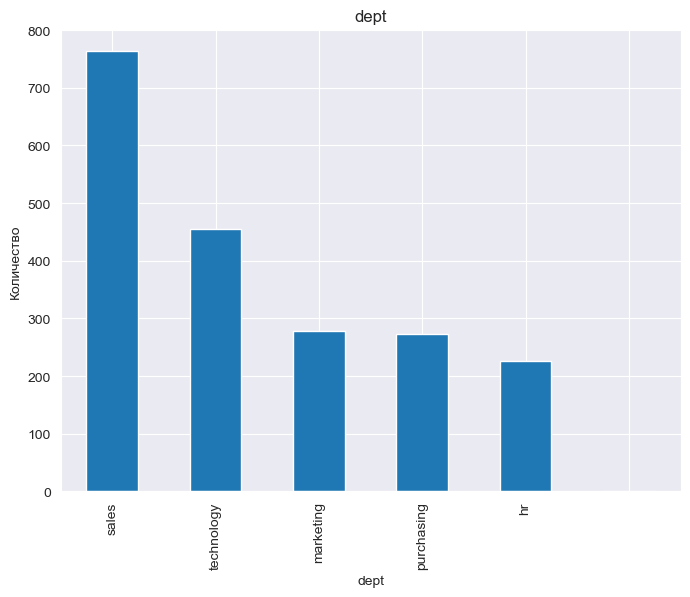

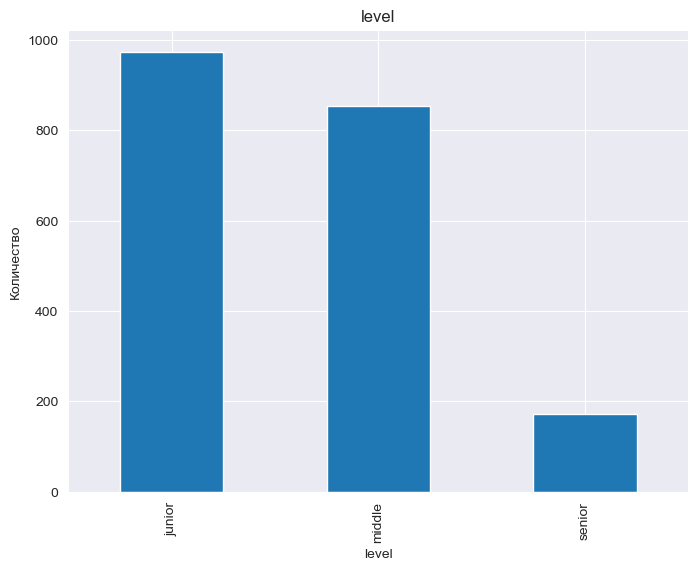

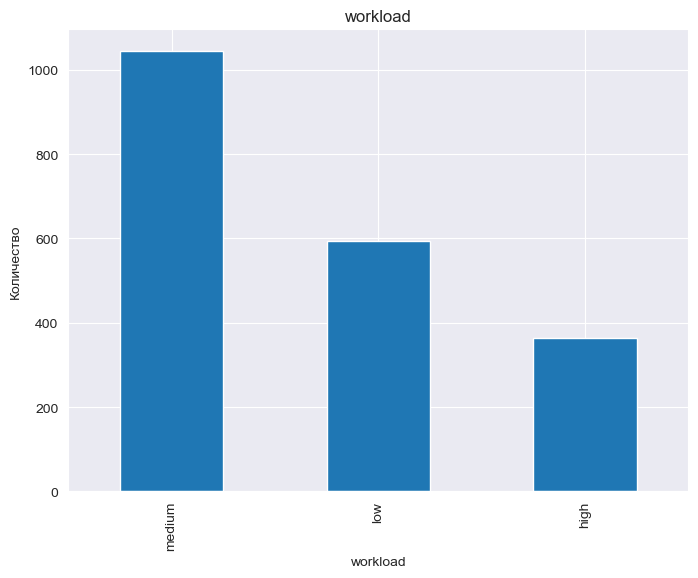

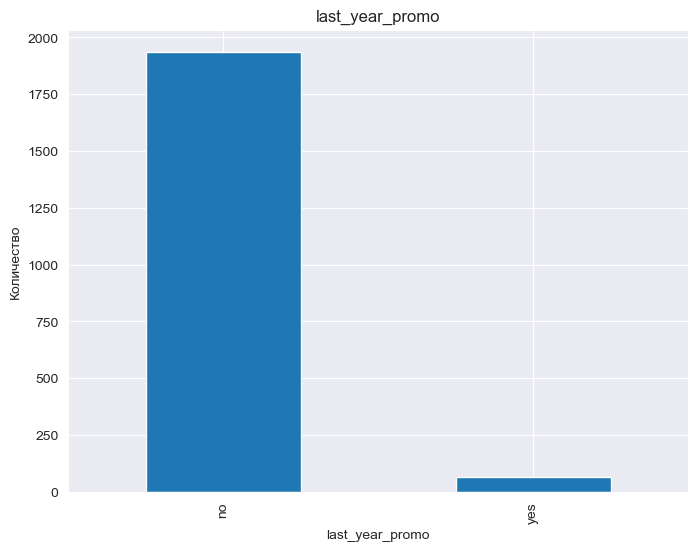

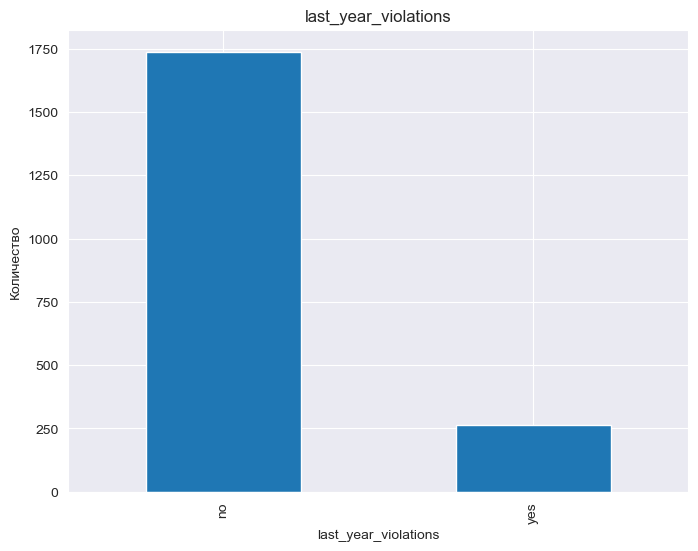

In [92]:
categorical_columns = test_data_X.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    test_data_X[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

#### Промежуточный вывод <br>
Данные выглядят похожими на тренировочную выборку. Применим такое же преобразование данных для тестовой выборки.

In [93]:
train_data.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate']).style.background_gradient(cmap='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.282265,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.717630,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.788820,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.483419,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.215025,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.010078,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.282265,0.717630,0.788820,0.483419,0.215025,0.010078,0.000000,1.000000,0.165830
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.165830,1.000000


In [94]:
test_data_X.drop('id', axis=1).phik_matrix(interval_cols=['salary']).style.background_gradient(cmap='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1.000000,0.000000,0.044329,0.000000,0.000000,0.000000,0.020219,0.238060
level,0.000000,1.000000,0.474370,0.689666,0.118258,0.017527,0.000000,0.748998
workload,0.044329,0.474370,1.000000,0.202096,0.035565,0.000000,0.035920,0.785872
employment_years,0.000000,0.689666,0.202096,1.000000,0.173637,0.066371,0.000000,0.494701
last_year_promo,0.000000,0.118258,0.035565,0.173637,1.000000,0.000000,0.011704,0.193727
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000
supervisor_evaluation,0.020219,0.000000,0.035920,0.000000,0.011704,0.189719,1.000000,0.114588
salary,0.238060,0.748998,0.785872,0.494701,0.193727,0.000000,0.114588,1.000000


#### Промежуточный вывод <br>
- Корреляция между признаками сильная, но не близкая к 0.9 для того, чтобы считать их мультиколлинеарными.

## Шаг 4. Подготовка данных

Создадим пайплайн для предобработки данных.

In [95]:
train_data.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [96]:
train_data = train_data.drop('id', axis=1)
train_data = train_data.drop_duplicates()

X_train = train_data.drop('job_satisfaction_rate', axis=1)
y_train = train_data['job_satisfaction_rate']

In [97]:
binary_columns = ['last_year_promo', 'last_year_violations']
ohe_columns = ['dept']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [98]:
ord_categories = [
    ['junior', 'middle', 'senior'],
    ['low', 'medium', 'high']
]

In [99]:
binary_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

ordinal_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ord_categories, handle_unknown='use_encoded_value', unknown_value=-1)),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [100]:
data_preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_pipeline, binary_columns),
    ('cat', categorical_pipeline, ohe_columns),
    ('ord', ordinal_pipeline, ord_columns),
    ('num', numeric_pipeline, num_columns)
])

In [101]:
param_grid = [
    # DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15),
        'models__min_samples_split': range(2, 10),
        'models__max_features': range(1, 15),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # LinearRegression
    {
        'models': [LinearRegression()],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # Ridge
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': [0.1, 1, 10],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [102]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [103]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

In [104]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [105]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, n_jobs=-1, scoring=smape_scorer)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('binary',
                                                                         Pipeline(steps=[('imputer_before',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder()),
                                                                                         ('imputer_after',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer_before'...
                                                        MinMaxScaler(),
                                                        'passthrough']},
                         {'models': [LinearRegression()],
                          'preprocessor__num__scaler': [StandardScaler(),
                                                        MinMaxScaler(),
                                                        'passthrough']},
                         {'models': [Ridge(random_state=42)],
                          'models__alpha': [0.1, 1, 10],
                          'preprocessor__num__scaler': [StandardScaler(),
                                                        MinMaxScaler(),
                                                        'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [106]:
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая оценка: {-grid_search.best_score_}')

Лучшие параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 10, 'models__min_samples_split': 8, 'preprocessor__num__scaler': StandardScaler()}
Лучшая оценка: 15.40063125667227


In [107]:
test_data_X = test_data_X.sort_values(by='id')
test_data_y = test_data_y.sort_values(by='id')

test_data_X = test_data_X.set_index('id')
test_data_y = test_data_y.set_index('id')

X_test = test_data_X
y_test = test_data_y['job_satisfaction_rate']

y_predict = grid_search.predict(X_test)

smape_score = smape(y_test, y_predict)

print(f"SMAPE на тестовой выборке: {smape_score:.2f}%")

SMAPE на тестовой выборке: 13.60%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Промежуточный вывод <br>
SMAPE на тестовой выборке составил 13.60%.

Лучшая модель - DecisionTreeRegressor с параметрами: <br>
- max_depth: 13 <br>
- max_features: 10 <br>
- min_samples_split: 8 <br>
- Scaler: StandardScaler

### Вывод по задаче 1 <br>
Была найдена лучшая модель для предсказания уровня удовлетворённости работой сотрудников. Модель DecisionTreeRegressor показала наилучший результат с SMAPE на тестовой выборке 13.60%. С её помощью можно достаточно точно определять уровень удовлетворённости работой сотрудников. Теперь можно предсказать уровень удовлетворённости работой сотрудников и принять меры для улучшения их рабочего процесса.

# Задача 2

## Шаг 1. Загрузка данных

In [108]:
try:
    train_data_quit = pd.read_csv('datasets/train_quit.csv')
    test_data_quit_X = pd.read_csv('datasets/test_features.csv')
    test_data_quit_y = pd.read_csv('datasets/test_target_quit.csv')
except FileNotFoundError:
    train_data_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    test_data_quit_X = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    test_data_quit_y = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

In [109]:
train_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [110]:
train_data_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [111]:
test_data_quit_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [112]:
test_data_quit_X.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


In [113]:
test_data_quit_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [114]:
test_data_quit_y.describe()

,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


#### Промежуточный вывод <br>
Данные успешно загружены и выглядят корректно.

## Шаг 2. Предобработка данных

#### Обработка пропусков

In [115]:
print(f'Количество пропусков в train_data: {train_data_quit.isna().sum().sum()}')
print(f'Количество пропусков в test_data_X: {test_data_quit_X.isna().sum().sum()}')
print(f'Количество пропусков в test_data_y: {test_data_quit_y.isna().sum().sum()}')

Количество пропусков в train_data: 0
Количество пропусков в test_data_X: 3
Количество пропусков в test_data_y: 0


In [116]:
train_data_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [117]:
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']
categorical_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

In [118]:
X_train_preprocessed = data_preprocessor.fit_transform(train_data_quit)
X_test_preprocessed = data_preprocessor.transform(test_data_quit_X)

#### Обработка дубликатов

In [119]:
print(f'Количество дубликатов в train_data: {train_data_quit.duplicated().sum()}')
print(f'Количество дубликатов в test_data_X: {test_data_quit_X.duplicated().sum()}')
print(f'Количество дубликатов в test_data_y: {test_data_quit_y.duplicated().sum()}')

Количество дубликатов в train_data: 0
Количество дубликатов в test_data_X: 0
Количество дубликатов в test_data_y: 0


In [120]:
for col in categorical_columns:
    print(f'{col}: {train_data_quit[col].unique()}')

dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'sinior']
workload: ['high' 'medium' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


In [121]:
for col in categorical_columns:
    print(f'{col}: {test_data_quit_X[col].unique()}')

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


In [122]:
train_data_quit.loc[train_data_quit['level'] == 'sinior', 'level'] = 'senior'
test_data_quit_X.loc[test_data_quit_X['level'] == 'sinior', 'level'] = 'senior'

test_data_quit_X.loc[test_data_quit_X['workload'] == ' ', 'workload'] = test_data_quit_X['workload'].mode()[0]

#### Промежуточный вывод <br>
Дубликаты отсутствуют. Опечатку в данных исправили

## Шаг 3. Исследовательский анализ данных

#### Тренировочная выборка

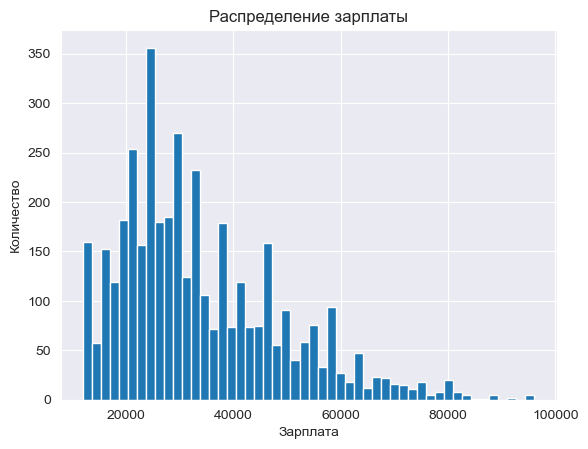

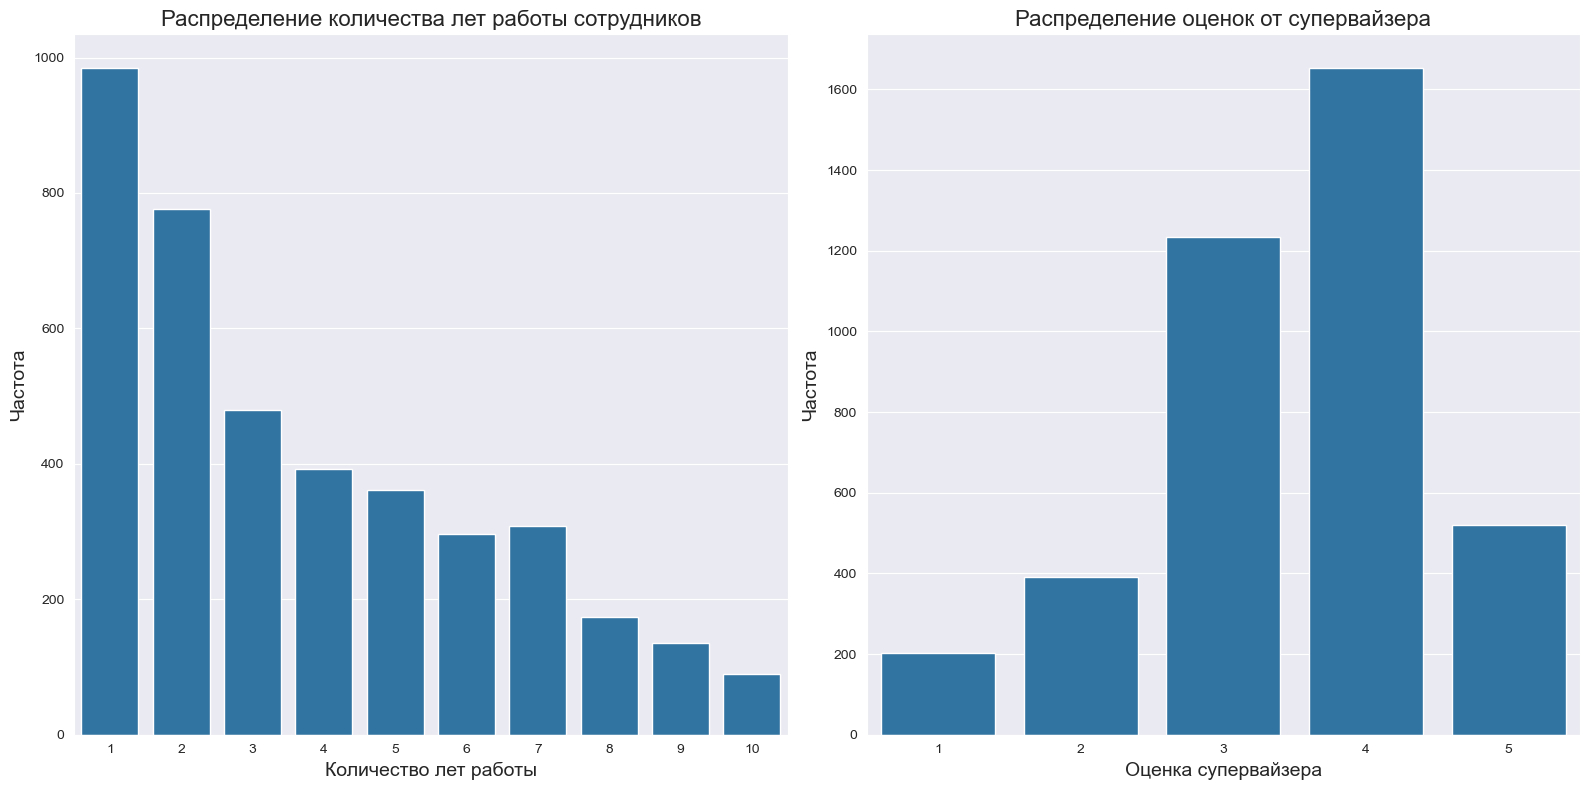

In [123]:
train_data_quit['salary'].hist(bins=50)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

# Employment years & supervisor evaluation
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='employment_years', data=train_data_quit)
plt.title('Распределение количества лет работы сотрудников', fontsize=16)
plt.xlabel('Количество лет работы', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x='supervisor_evaluation', data=train_data_quit)
plt.title('Распределение оценок от супервайзера', fontsize=16)
plt.xlabel('Оценка супервайзера', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.tight_layout()
plt.show()

Построим боксплоты для числовых признаков.

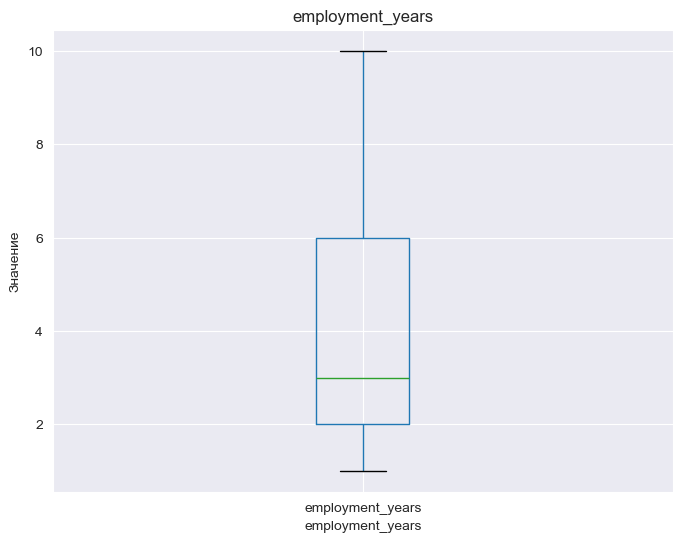

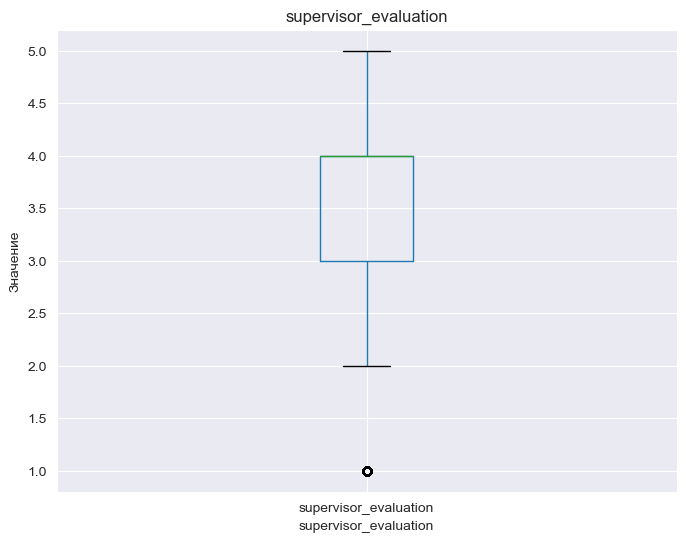

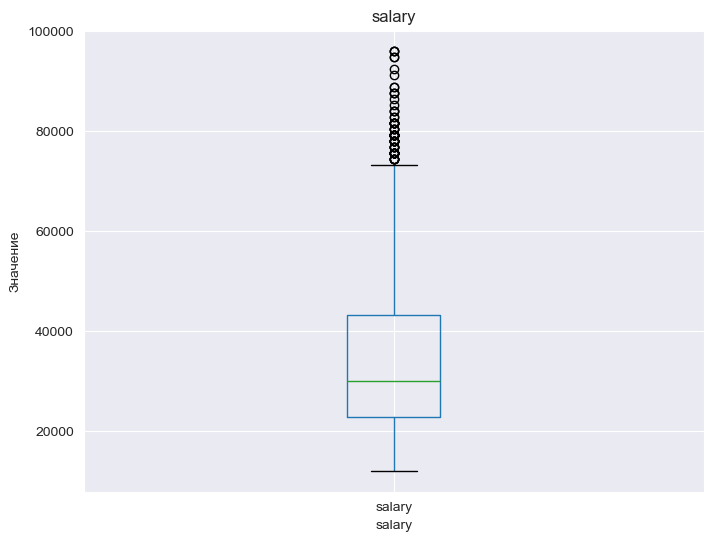

In [124]:
for column in num_columns:
    plt.figure(figsize=(8, 6))
    train_data_quit.boxplot(column=column)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Значение')
    plt.show()

#### Промежуточный вывод <br>
Есть много значений в признаке 'salary', которые намного больше медианы.
В остальном данные выглядят корректно.

#### Исследование категориальных признаков

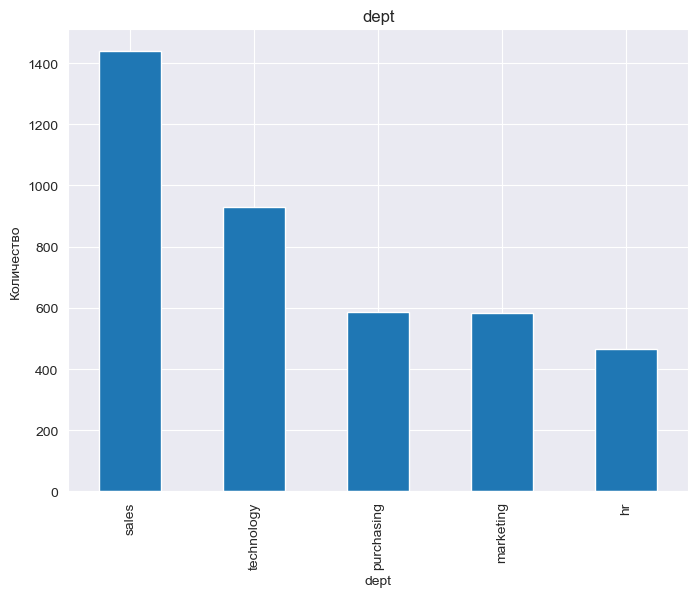

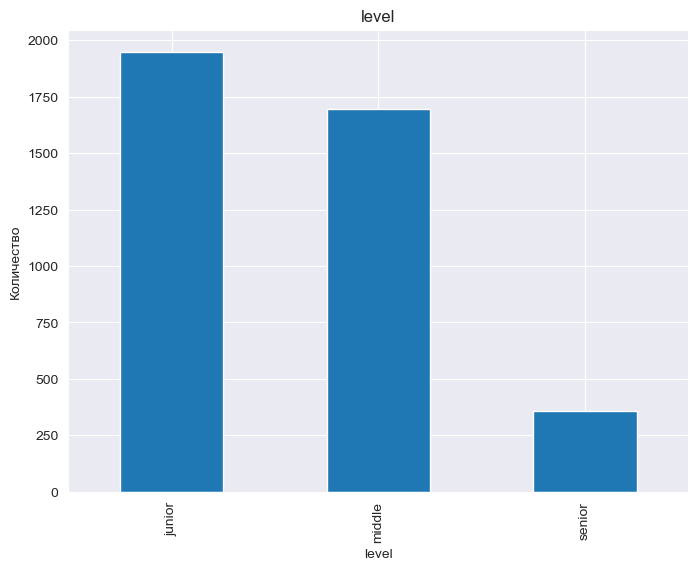

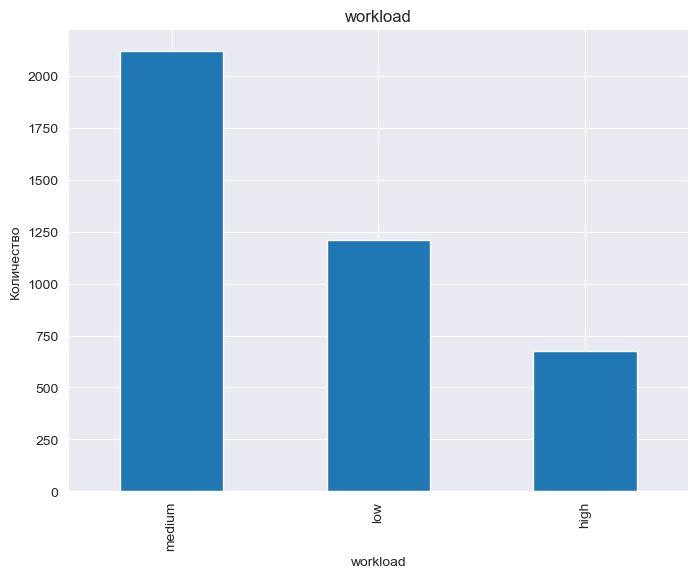

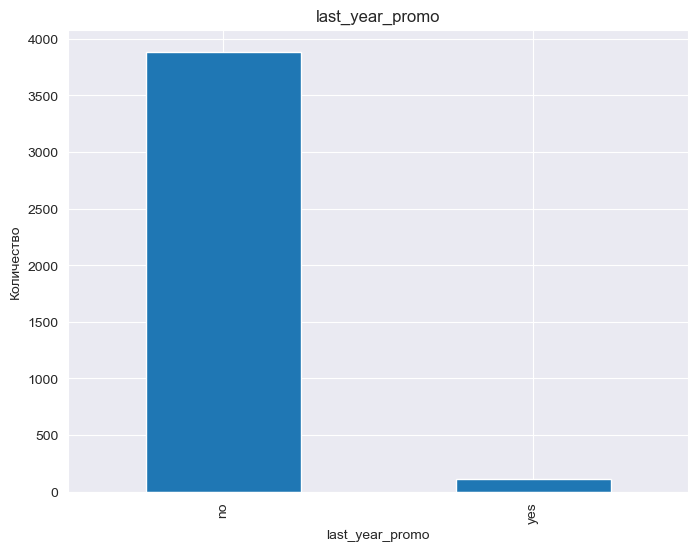

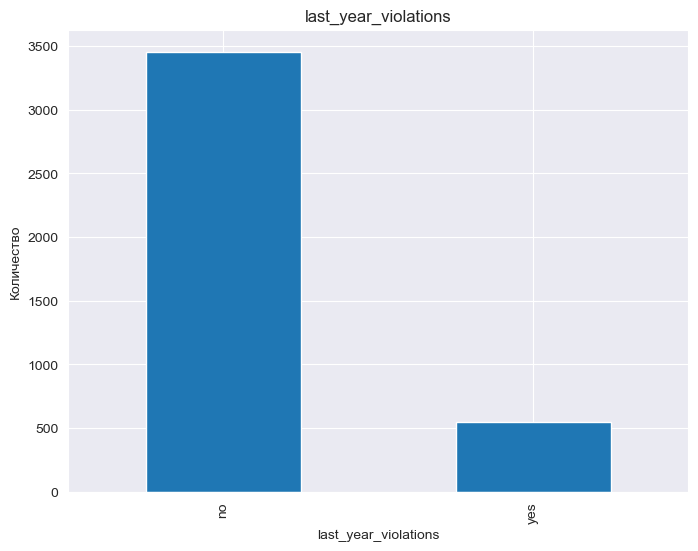

In [125]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    train_data_quit[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

#### Промежуточный вывод <br>
Данные выглядят корректно.

#### Тестовая выборка

#### Исследование количественных признаков

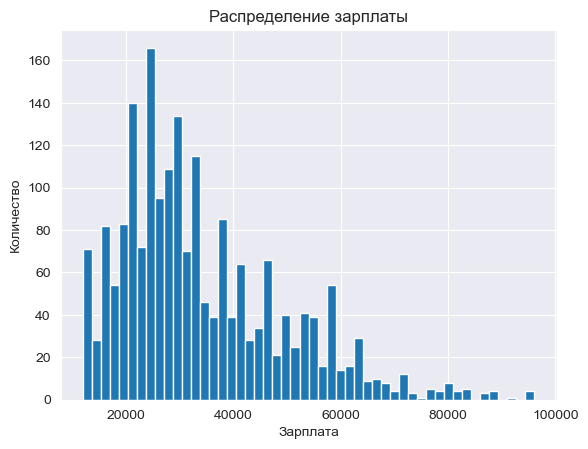

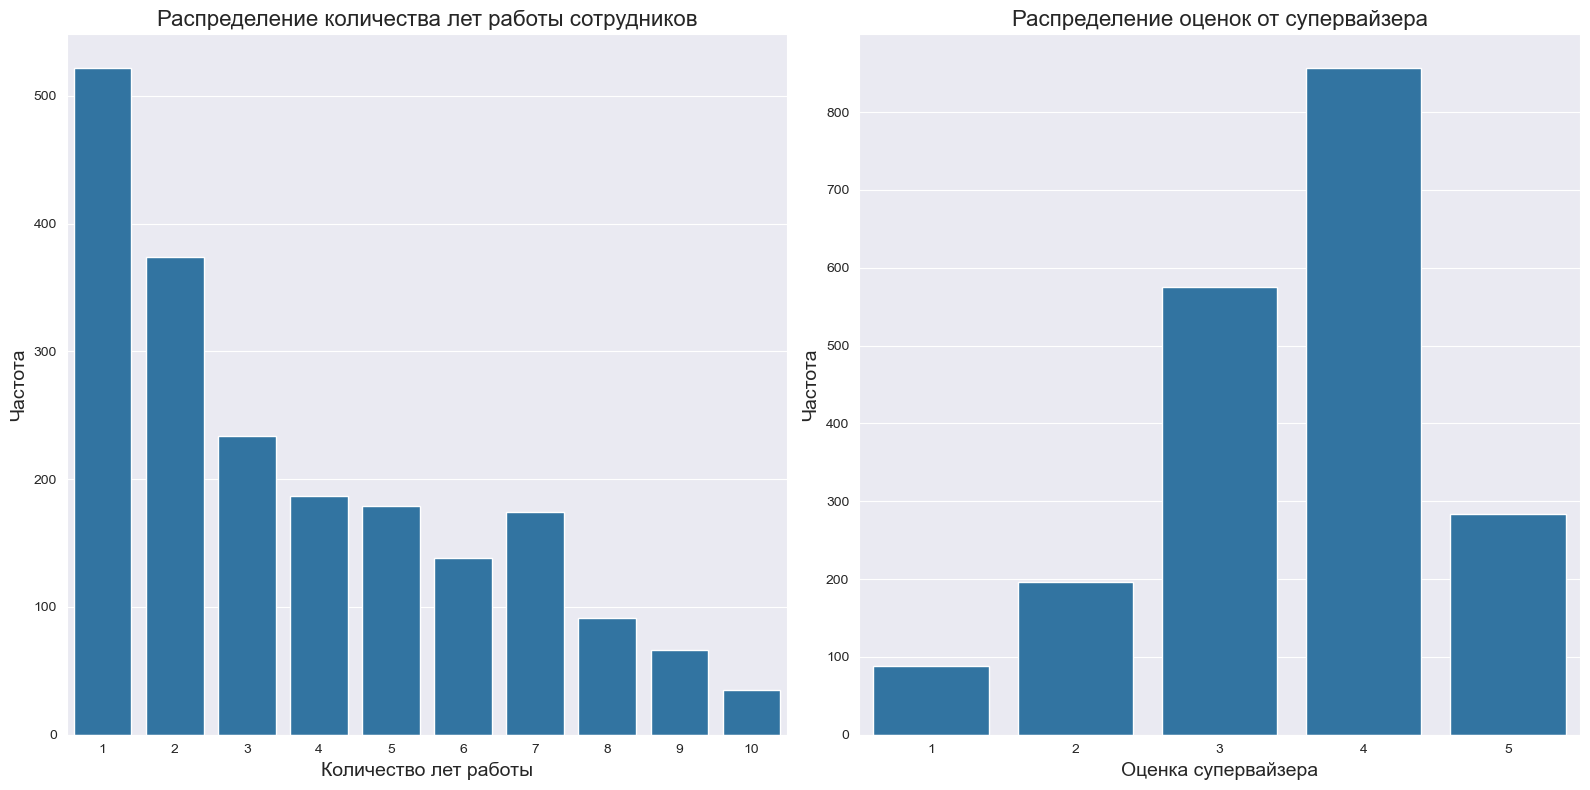

In [126]:
test_data_quit_X['salary'].hist(bins=50)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

# Employment years & supervisor evaluation
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='employment_years', data=test_data_quit_X)
plt.title('Распределение количества лет работы сотрудников', fontsize=16)
plt.xlabel('Количество лет работы', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x='supervisor_evaluation', data=test_data_quit_X)
plt.title('Распределение оценок от супервайзера', fontsize=16)
plt.xlabel('Оценка супервайзера', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.tight_layout()
plt.show()

#### Исследование категориальных признаков

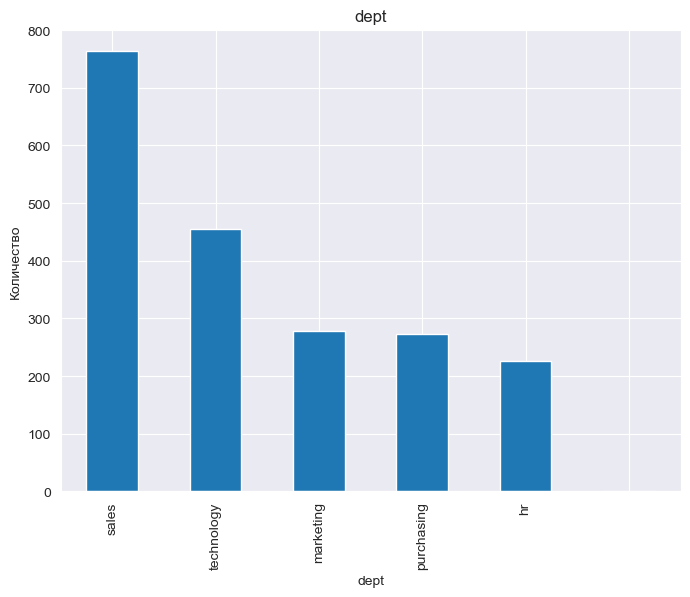

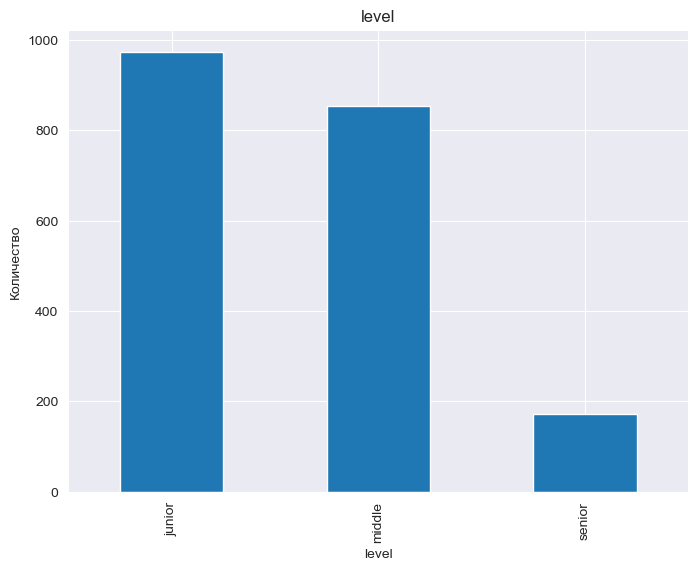

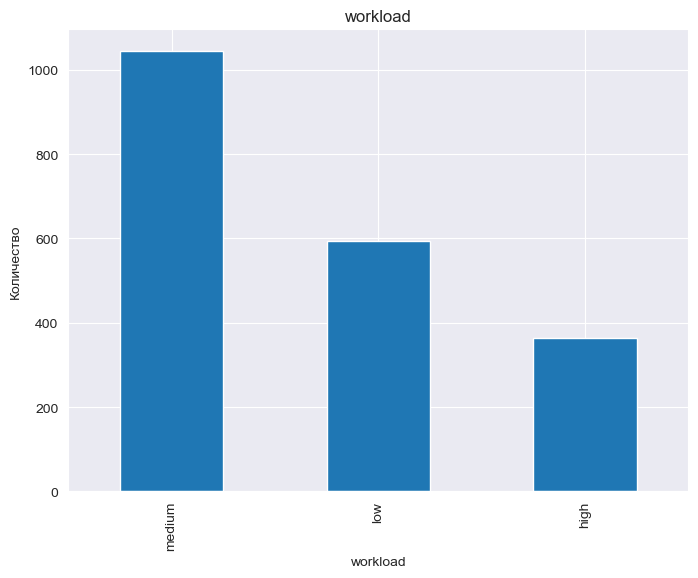

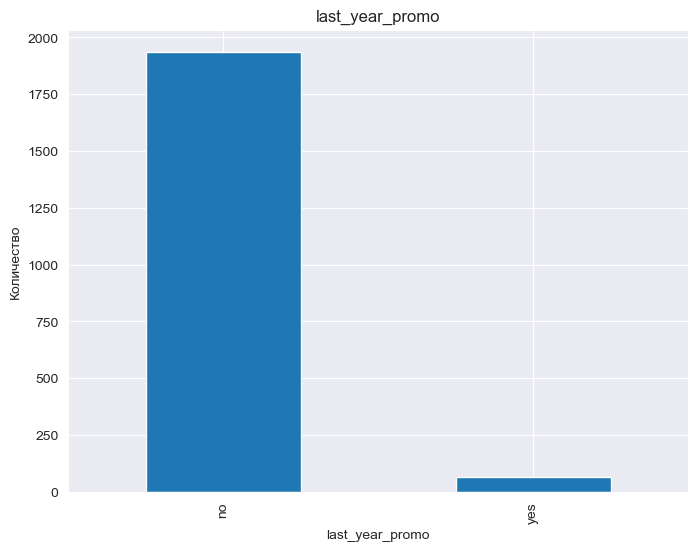

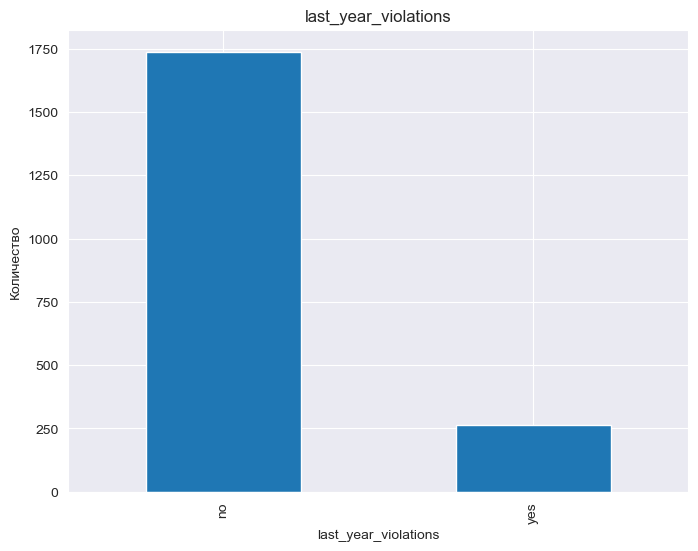

In [127]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    test_data_quit_X[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

### Составление портрета «уволившегося сотрудника»

Анализ категориальных признаков:
Процент уволившихся сотрудников по признаку dept:
sales: 36.08%
technology: 24.47%
purchasing: 14.72%
marketing: 14.45%
hr: 10.28%
Процент оставшихся сотрудников по признаку dept:
sales: 35.90%
technology: 22.70%
purchasing: 14.69%
marketing: 14.59%
hr: 12.12%



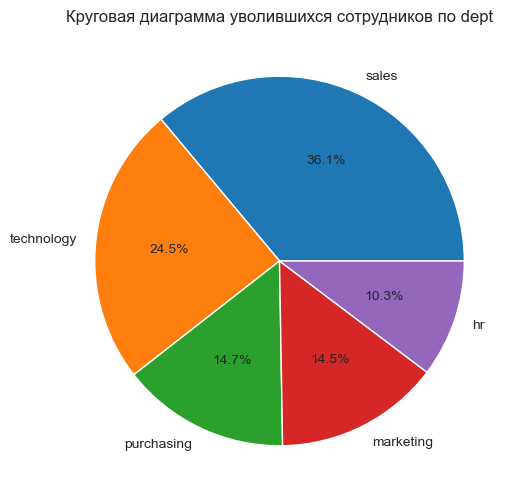

Процент уволившихся сотрудников по признаку level:
junior: 88.92%
middle: 9.57%
senior: 1.51%
Процент оставшихся сотрудников по признаку level:
middle: 55.22%
junior: 32.94%
senior: 11.84%



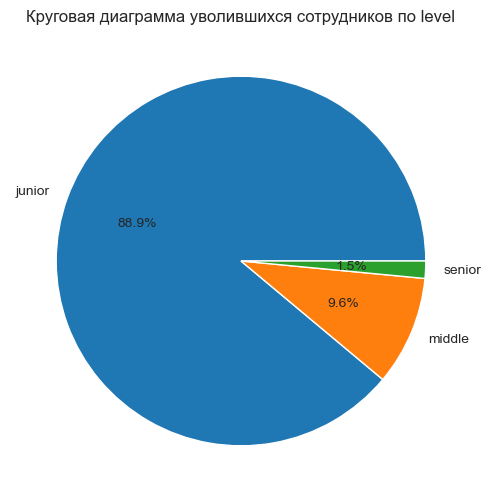

Процент уволившихся сотрудников по признаку workload:
low: 46.01%
medium: 43.26%
high: 10.73%
Процент оставшихся сотрудников по признаку workload:
medium: 56.75%
low: 23.99%
high: 19.25%



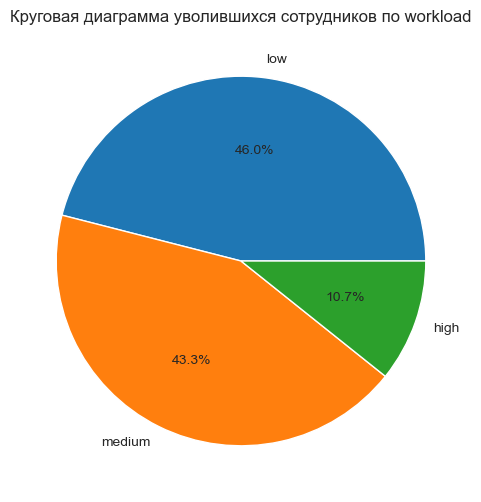

Процент уволившихся сотрудников по признаку last_year_promo:
no: 99.91%
yes: 0.09%
Процент оставшихся сотрудников по признаку last_year_promo:
no: 96.10%
yes: 3.90%



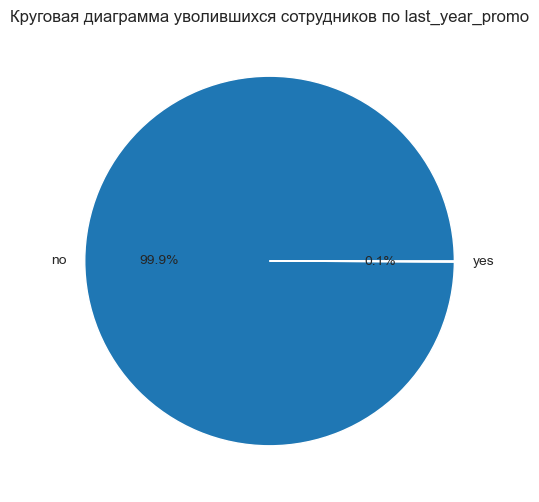

Процент уволившихся сотрудников по признаку last_year_violations:
no: 79.79%
yes: 20.21%
Процент оставшихся сотрудников по признаку last_year_violations:
no: 88.96%
yes: 11.04%



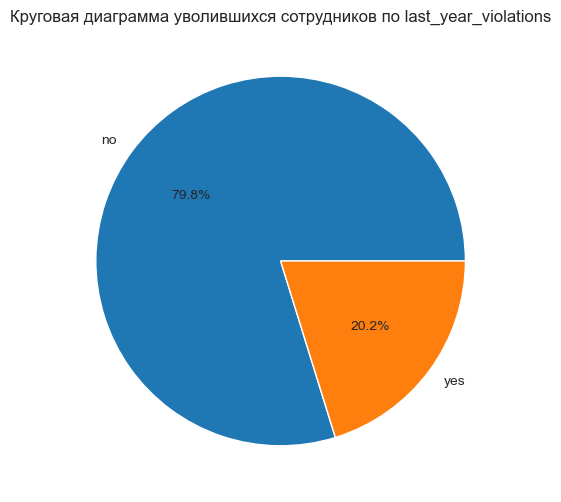

Процент уволившихся сотрудников по признаку employment_years:
1: 53.10%
2: 25.71%
3: 14.45%
4: 2.39%
5: 2.04%
6: 0.89%
7: 0.62%
10: 0.27%
8: 0.27%
9: 0.27%
Процент оставшихся сотрудников по признаку employment_years:
2: 16.96%
1: 13.44%
4: 12.74%
5: 11.80%
3: 11.00%
7: 10.48%
6: 9.96%
8: 5.95%
9: 4.63%
10: 3.03%



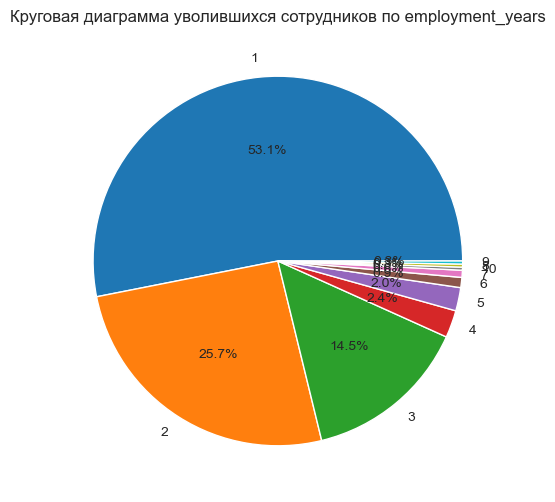

Процент уволившихся сотрудников по признаку supervisor_evaluation:
3: 46.37%
4: 25.35%
2: 14.54%
1: 8.42%
5: 5.32%
Процент оставшихся сотрудников по признаку supervisor_evaluation:
4: 47.63%
3: 24.72%
5: 16.02%
2: 7.90%
1: 3.73%



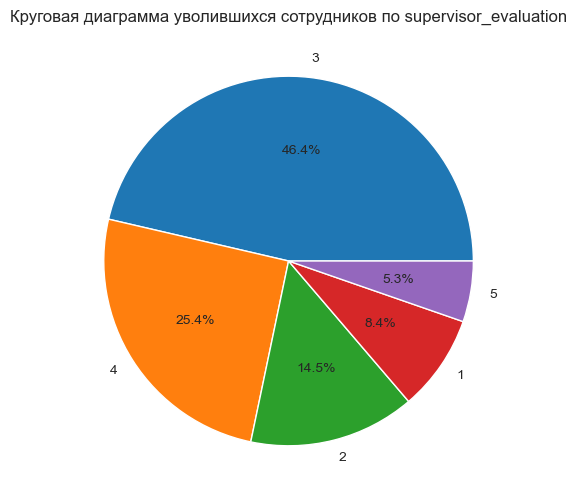

Анализ числовых признаков:
Среднее значение признака salary для уволившихся сотрудников: 23885.11
Среднее значение признака salary для оставшихся сотрудников: 37702.23



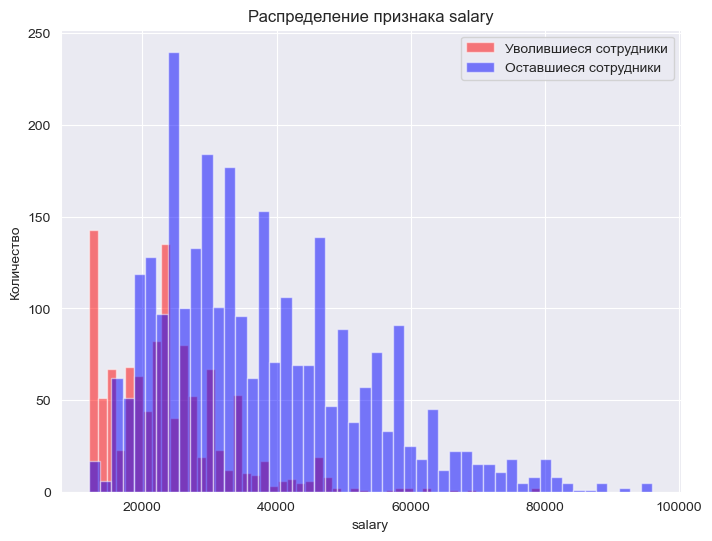

In [128]:
# Разделение данных на уволившихся и оставшихся сотрудников
quit_employees = train_data_quit[train_data_quit['quit'] == 'yes']
stay_employees = train_data_quit[train_data_quit['quit'] == 'no']

# Объединение значений в колонке 'employment_years' в категорию "5+"
quit_employees['employment_years'] = quit_employees['employment_years'].apply(lambda x: '5+' if x > 5 else str(x))
stay_employees['employment_years'] = stay_employees['employment_years'].apply(lambda x: '5+' if x > 5 else str(x))

# Дискретные признаки
discrete_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'employment_years',
                    'supervisor_evaluation']
# Числовые признаки
numeric_columns = ['salary']

# Анализ категориальных (дискретных) признаков
print('Анализ категориальных признаков:')
for column in discrete_columns:
    quit_by_column = quit_employees[column].value_counts(normalize=True) * 100
    stay_by_column = stay_employees[column].value_counts(normalize=True) * 100

    print(f'Процент уволившихся сотрудников по признаку {column}:')
    for value, percent in quit_by_column.items():
        print(f'{value}: {percent:.2f}%')

    print(f'Процент оставшихся сотрудников по признаку {column}:')
    for value, percent in stay_by_column.items():
        print(f'{value}: {percent:.2f}%')
    print()

    plt.figure(figsize=(6, 6))
    plt.pie(quit_by_column, labels=quit_by_column.index, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1)
    plt.title(f'Круговая диаграмма уволившихся сотрудников по {column}')
    plt.show()


# Анализ числовых признаков
print('Анализ числовых признаков:')
for column in numeric_columns:
    average_quit = quit_employees[column].mean()
    average_stay = stay_employees[column].mean()

    print(f'Среднее значение признака {column} для уволившихся сотрудников: {round(average_quit, 2)}')
    print(f'Среднее значение признака {column} для оставшихся сотрудников: {round(average_stay, 2)}')
    print()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(quit_employees[column], label='Уволившиеся сотрудники', fill=True)
    sns.kdeplot(stay_employees[column], label='Оставшиеся сотрудники', fill=True)
    plt.legend()
    plt.title(f'Плотность распределения признака {column}')
    plt.xlabel(column)
    plt.ylabel('Плотность')
    plt.show()


### Промежуточный вывод

**Портрет уволившегося сотрудника**:

1. **Отдел**:
   - Наибольший процент уволившихся сотрудников работал в отделе **sales** (36%), за ним следуют **technology** (24%) и **purchasing** (15%).

2. **Уровень**:
   - Подавляющее большинство уволившихся сотрудников имели **junior** уровень (89%), тогда как уровень **middle** встречается лишь у 9.6% уволившихся, а **senior** — всего у 1.5%.

3. **Уровень загруженности**:
   - У 46% уволившихся сотрудников загруженность была **низкой** (low), а у 43% — **средней** (medium). Высокая загруженность наблюдается только у 11% уволившихся.

4. **Повышения за последний год**:
   - Почти все уволившиеся сотрудники (99.9%) не получали повышения в прошлом году.

5. **Нарушения за последний год**:
   - 20% уволившихся сотрудников имели нарушения за последний год, тогда как 80% не имели нарушений.

6. **Среднее количество лет работы**:
   - Уволившиеся сотрудники в среднем проработали в компании **1.84 года**, тогда как оставшиеся — **4.43 года**.

7. **Оценка супервайзера**:
   - Оценка уволившихся сотрудников ниже — **3.05** против **3.64** у оставшихся.

8. **Зарплата**:
   - Средняя зарплата уволившихся сотрудников составляет **23885.11**, что значительно ниже по сравнению с зарплатой оставшихся сотрудников — **37702.23**.

### Общий вывод

Уволившиеся сотрудники чаще всего:
- Работают в отделе **sales**.
- Имеют **junior** уровень.
- Их уровень загруженности чаще **низкий** или **средний**.
- Они редко получают повышение.
- Чаще имеют более низкую оценку от супервайзера и меньший опыт работы, чем те, кто остаётся в компании.
- Зарплата уволившихся сотрудников значительно ниже, чем у тех, кто остаётся в компании.


### Влияет ли уровень удовлетворённости на увольнение?

In [129]:
employees_with_job_satisfaction_rate = test_data_quit_y.merge(test_data_y, on='id')
employees_with_job_satisfaction_rate

,id,quit,job_satisfaction_rate
0,999029,yes,0.35
1,372846,no,0.21
2,726767,no,0.73
3,490105,no,0.62
4,416898,yes,0.57
...,...,...,...
1995,836109,yes,0.61
1996,180999,yes,0.60
1997,746018,no,0.70
1998,247658,no,0.67


In [130]:
quit_employees = employees_with_job_satisfaction_rate[employees_with_job_satisfaction_rate['quit'] == 'yes']
stay_employees = employees_with_job_satisfaction_rate[employees_with_job_satisfaction_rate['quit'] == 'no']

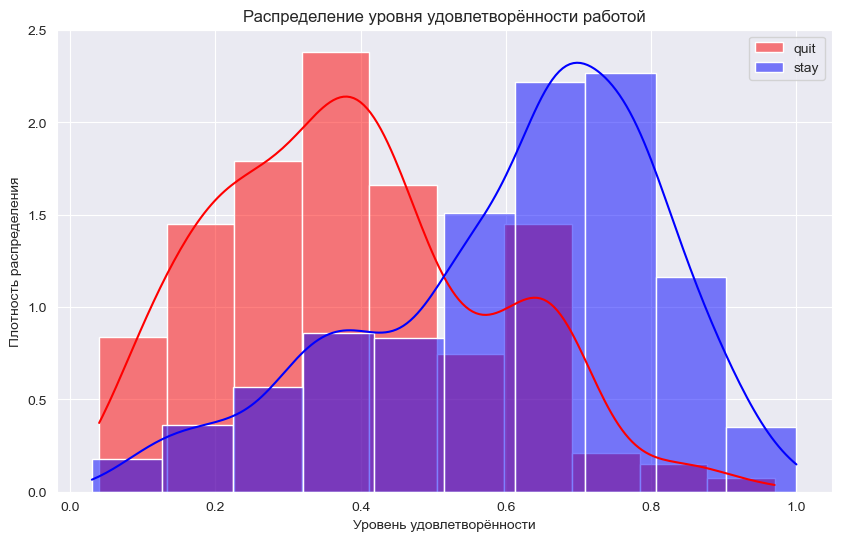

In [131]:
plt.figure(figsize=(10, 6))

sns.histplot(quit_employees['job_satisfaction_rate'], bins=10, stat='density', common_norm=False, kde=True, color='red', label='quit')

sns.histplot(stay_employees['job_satisfaction_rate'], bins=10, stat='density', common_norm=False, kde=True, color='blue', label='stay')

plt.title('Распределение уровня удовлетворённости работой')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show()

#### Промежуточный вывод <br>
На графике видно, что уровень удовлетворённости работой у уволившихся сотрудников ниже, чем у оставшихся.
Работники с низким уровнем удовлетворённости увольняются чаще. Граница уровня удовлетворённости, после которой сотрудники остаются, примерно равна 0.5.

## Шаг 4. Добавление нового входного признака

In [132]:
job_satisfaction_rate_train_pred = grid_search.predict(train_data_quit)
job_satisfaction_rate_test_pred = grid_search.predict(test_data_quit_X)

train_data_quit['job_satisfaction_rate'] = job_satisfaction_rate_train_pred
test_data_quit_X['job_satisfaction_rate'] = job_satisfaction_rate_test_pred

display(train_data_quit)
display(test_data_quit_X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.660000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.851538
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.363810
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.532000
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.841739
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.544286
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.515714


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.855000
1,686555,hr,junior,medium,1,no,no,4,30000,0.676667
2,467458,sales,middle,low,5,no,no,4,19200,0.654286
3,418655,sales,middle,low,6,no,no,4,19200,0.654286
4,789145,hr,middle,medium,5,no,no,5,40800,0.824643
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.532000
1996,109582,technology,middle,low,3,no,no,2,21600,0.152000
1997,305653,technology,junior,low,1,no,no,3,14400,0.156000
1998,160233,technology,middle,low,8,no,no,1,32400,0.440000


#### Промежуточный вывод <br>
Добавили новый признак 'job_satisfaction_rate' на основе предсказаний модели.

#### Построим матрицу корреляций

In [133]:
train_data_quit.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate']).style.background_gradient(cmap='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.280300,0.000000,0.204907
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.745104,0.312799,0.195236
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.793876,0.132243,0.222748
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.491915,0.659093,0.405981
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.215043,0.157370,0.429006
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.086087,0.185071,0.624949
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.055330,0.245489,0.780863
salary,0.280300,0.745104,0.793876,0.491915,0.215043,0.086087,0.055330,1.000000,0.564154,0.296511
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.564154,1.000000,0.513553
job_satisfaction_rate,0.204907,0.195236,0.222748,0.405981,0.429006,0.624949,0.780863,0.296511,0.513553,1.000000


In [134]:
test_data_quit_X.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate']).style.background_gradient(cmap='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.044329,0.000000,0.000000,0.000000,0.020219,0.238060,0.122621
level,0.000000,1.000000,0.474370,0.689666,0.118258,0.017527,0.000000,0.748998,0.191776
workload,0.044329,0.474370,1.000000,0.202096,0.035565,0.000000,0.035920,0.785872,0.226592
employment_years,0.000000,0.689666,0.202096,1.000000,0.173637,0.066371,0.000000,0.494701,0.416985
last_year_promo,0.000000,0.118258,0.035565,0.173637,1.000000,0.000000,0.011704,0.193727,0.323930
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000,0.619750
supervisor_evaluation,0.020219,0.000000,0.035920,0.000000,0.011704,0.189719,1.000000,0.114588,0.783615
salary,0.238060,0.748998,0.785872,0.494701,0.193727,0.000000,0.114588,1.000000,0.313947
job_satisfaction_rate,0.122621,0.191776,0.226592,0.416985,0.323930,0.619750,0.783615,0.313947,1.000000


#### Промежуточный вывод <br>
Мультиколлинеарности не наблюдается.

## Шаг 5. Подготовка данных

In [135]:
label_encoder = LabelEncoder()

In [136]:
test_data_quit_X = test_data_quit_X.sort_values(by='id')
test_data_quit_y = test_data_quit_y.sort_values(by='id')

In [137]:
X_train = train_data_quit.drop(['id', 'quit'], axis=1)
X_test = test_data_quit_X.drop('id', axis=1)

y_train = label_encoder.fit_transform(train_data_quit['quit'])
y_test = label_encoder.transform(test_data_quit_y['quit'])

In [138]:
binary_columns = ['last_year_promo', 'last_year_violations']
ohe_columns = ['dept', 'level', 'workload']
ord_columns = ['last_year_promo', 'last_year_violations']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [139]:
binary_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('encoder', OrdinalEncoder()),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

ordinal_pipeline = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('encoder', OrdinalEncoder()),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [140]:
data_preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_pipeline, binary_columns),
    ('cat', categorical_pipeline, ohe_columns),
    ('ord', ordinal_pipeline, ord_columns),
    ('num', numeric_pipeline, num_columns)
])

## Шаг 6. Обучение модели

In [141]:
param_grid = [
    # LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.01, 0.1, 1, 10],
    },

    # RandomForestClassifier
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 150, 200, 300, 350],
        'models__max_depth': [5, 10, 15, 20],
    },

    # XGBClassifier
    {
        'models': [XGBClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': [5, 10, 15],
    }
]

In [142]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

In [143]:
randomized_search = RandomizedSearchCV(full_pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('binary',
                                                                               Pipeline(steps=[('imputer_before',
                                                                                                SimpleImputer(fill_value='unknown',
                                                                                                              strategy='constant')),
                                                                                               ('encoder',
                                                                                                OrdinalEncoder()),
                                                                                               ('imputer_after',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('cat',
                                                                               Pipeline(st...
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=42, ...)],
                                         'models__max_depth': [5, 10, 15],
                                         'models__n_estimators': [100, 200,
                                                                  300]}],
                   random_state=42, scoring='roc_auc')

In [144]:
print(f'Лучшие параметры: {randomized_search.best_params_}')
print(f'Лучшая оценка: {randomized_search.best_score_:.4f}')

Лучшие параметры: {'models__n_estimators': 300, 'models__max_depth': 10, 'models': RandomForestClassifier(random_state=42)}
Лучшая оценка: 0.9399


#### Промежуточный вывод <br>
Лучшая модель - RandomForestClassifier с параметрами: <br>
- n_estimators: 300 <br>
- max_depth: 10 <br>

#### Лучшая оценка на тренировочной выборке по метрике ROC-AUC: 0.94

In [145]:
y_predict = randomized_search.predict_proba(X_test)[:, 1]

score = roc_auc_score(y_test, y_predict)

print(f'ROC-AUC на тестовой выборке: {score:.4f}')

ROC-AUC на тестовой выборке: 0.9294


#### Метрика ROC-AUC на тестовой выборке: 0.93


### Вывод по задаче 2 <br>
Лучшая модель - RandomForestClassifier. С её помощью удалось достичь ROC-AUC на тестовой выборке 0.93, что является хорошим результатом и позволяет компании вовремя определять уйдёт сотрудник или нет.

# Описание проекта

Компания **«Работа с заботой»** предоставляет данные для анализа оттока сотрудников и уровня их удовлетворённости работой. Цель проекта — использовать машинное обучение для двух ключевых задач:

1. **Предсказание уровня удовлетворённости сотрудника** на основе его характеристик.
2. **Предсказание увольнения сотрудника** на основе тех же характеристик, с добавлением предсказанной удовлетворённости.

## Задача 1: Предсказание уровня удовлетворённости сотрудника

### Шаг 1. Загрузка данных
Мы получили следующие данные:
- **Тренировочная выборка**: `train_job_satisfaction_rate.csv`
- **Тестовая выборка**: признаки `test_features.csv` и целевой признак `test_target_job_satisfaction_rate.csv`

### Шаг 2. Предобработка данных
Данные были изучены, и выполнена необходимая предобработка:
- Удалены дубликаты.
- Заполнены пропуски.
- Признаки разделены на категориальные, бинарные, порядковые и числовые.
- Все операции были автоматизированы через пайплайн с применением различных кодировщиков.

### Шаг 3. Исследовательский анализ данных (EDA)
Был проведён анализ всех признаков:
- Исследованы распределения числовых признаков.
- Исследованы распределения категориальных признаков.

### Шаг 4. Подготовка данных
Данные были подготовлены в пайплайне:
- Использованы **OneHotEncoder** для категориальных признаков.
- **OrdinalEncoder** для порядковых признаков.
- Пропуски в числовых признаках заполнены с помощью **SimpleImputer**.

### Шаг 5. Обучение моделей
Обучены две модели:
1. **DecisionTreeRegressor**
2. **LinearRegression**
3. **Ridge**

Подбор гиперпараметров был выполнен с помощью **GridSearchCV**, с использованием метрики SMAPE для выбора наилучшей модели.

**Критерий успеха**: SMAPE ≤ 15 на тестовой выборке. Удалось достигнуть 13.6

### Шаг 6. Оформление выводов
- **Дерево решений** справилось лучше, чем остальные модели, по метрике SMAPE.
- Пайплайн автоматизировал повторяющиеся шаги предобработки, что позволило ускорить эксперименты с моделями.

## Задача 2: Предсказание увольнения сотрудника

### Шаг 1. Загрузка данных
Данные для задачи включали:
- **Тренировочная выборка**: `train_quit.csv`
- **Тестовая выборка**: признаки из прошлой задачи и целевой признак `test_target_quit.csv`

### Шаг 2. Предобработка данных
- Данные были обработаны аналогично первой задаче.
- Целевой признак (`quit`) был закодирован с использованием **LabelEncoder**.

### Шаг 3. Исследовательский анализ данных (EDA)
- Был составлен портрет уволившегося сотрудника:
- Работают в отделе **sales**.
- Имеют **junior** уровень.
- Их уровень загруженности чаще **низкий** или **средний**.
- Они редко получают повышение.
- Чаще имеют более низкую оценку от супервайзера и меньший опыт работы, чем те, кто остаётся в компании.
- Зарплата уволившихся сотрудников значительно ниже, чем у тех, кто остаётся в компании.

### Шаг 4. Добавление нового входного признака
Было добавлено предсказанное значение `job_satisfaction_rate` из первой задачи в качестве нового признака для второй задачи.

### Шаг 5. Подготовка данных
Подготовка данных была выполнена аналогично первой задаче, с применением нескольких кодировщиков для признаков.

### Шаг 6. Обучение моделей
Обучены три модели:
1. **LogisticRegression**.
2. **RandomForestClassifier**.
3. **XGBClassifier**.

Для моделей был выполнен подбор гиперпараметров с использованием **RandomizedSearchCV**.

**Критерий успеха**: ROC-AUC ≥ 0.91 на тестовой выборке.

### Шаг 7. Выводы
- **RandomForestClassifier** показал наилучшие результаты с ROC-AUC = 0.94.

## Общий вывод

В рамках проекта были выполнены следующие задачи:
- Построены три модели для предсказания удовлетворённости сотрудников.
- Построены три модели для предсказания увольнения сотрудников.
- Использован пайплайн для автоматизации предобработки данных и обучения моделей.
- Подобраны гиперпараметры с использованием **GridSearchCV** и **RandomizedSearchCV**.
- В проекте достигнуты целевые метрики: SMAPE ≤ 15 и ROC-AUC ≥ 0.91.

### Выводы и предложения для бизнеса:
- Модели, разработанные в рамках проекта, могут помочь HR-аналитикам компании «Работа с заботой» прогнозировать отток сотрудников и их удовлетворённость работой, что позволит сократить финансовые потери.
- Добавление признаков, связанных с удовлетворённостью, может улучшить точность прогнозирования увольнений.
- Компании стоит обращать больше внимания на предсказания моделей, чтобы удерживать сотрудников в компании
